In [25]:
# Завантаження даних CIFAR-10
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Завантаження даних CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Переконайтесь, що форма даних правильна
print(x_train.shape)  # Очікується (50000, 32, 32, 3)
print(x_test.shape)   # Очікується (10000, 32, 32, 3)
print(y_train.shape)  # Очікується (50000, 1)
print(y_test.shape)   # Очікується (10000, 1)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


Epoch 1/100
782/782 - 75s - 96ms/step - accuracy: 0.3694 - loss: 1.7799 - val_accuracy: 0.5284 - val_loss: 1.2913 - learning_rate: 0.0010
Epoch 2/100
782/782 - 67s - 86ms/step - accuracy: 0.4776 - loss: 1.4449 - val_accuracy: 0.5239 - val_loss: 1.4082 - learning_rate: 0.0010
Epoch 3/100
782/782 - 56s - 72ms/step - accuracy: 0.5172 - loss: 1.3393 - val_accuracy: 0.5203 - val_loss: 1.3898 - learning_rate: 0.0010
Epoch 4/100
782/782 - 55s - 71ms/step - accuracy: 0.5463 - loss: 1.2697 - val_accuracy: 0.5702 - val_loss: 1.3008 - learning_rate: 0.0010
Epoch 5/100
782/782 - 81s - 104ms/step - accuracy: 0.5695 - loss: 1.2083 - val_accuracy: 0.5211 - val_loss: 1.3675 - learning_rate: 0.0010
Epoch 6/100
782/782 - 52s - 67ms/step - accuracy: 0.5902 - loss: 1.1603 - val_accuracy: 0.5636 - val_loss: 1.2408 - learning_rate: 0.0010
Epoch 7/100
782/782 - 55s - 71ms/step - accuracy: 0.6040 - loss: 1.1258 - val_accuracy: 0.6490 - val_loss: 0.9790 - learning_rate: 0.0010
Epoch 8/100
782/782 - 82s - 105ms

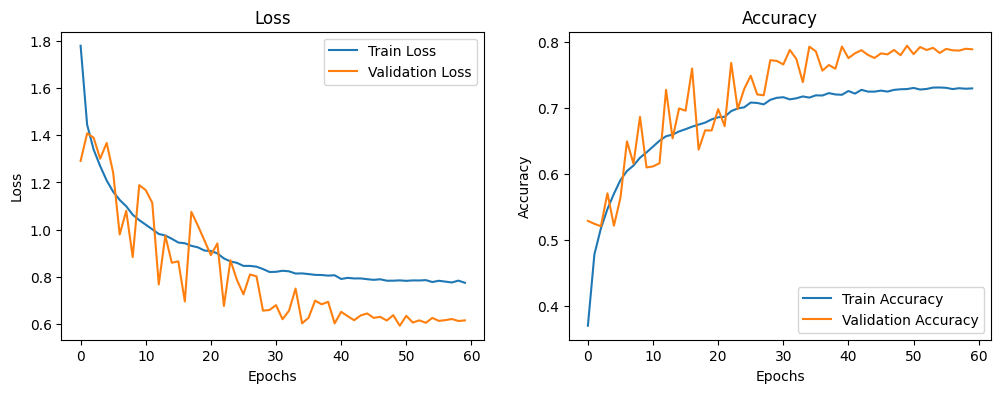

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [26]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2
)

datagen.fit(x_train)

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),

    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=100,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr],
                    verbose=2)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Побудова графіків втрат та точності
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

plot_history(history)

# Прогнозування на тестових даних
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

In [27]:
from sklearn.metrics import classification_report

# Створення класифікаційного звіту
report = classification_report(y_test, y_pred_classes, target_names=[
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
])

print(report)

              precision    recall  f1-score   support

    airplane       0.89      0.78      0.83      1000
  automobile       0.92      0.91      0.91      1000
        bird       0.88      0.56      0.68      1000
         cat       0.76      0.53      0.63      1000
        deer       0.75      0.77      0.76      1000
         dog       0.77      0.69      0.73      1000
        frog       0.58      0.96      0.73      1000
       horse       0.82      0.85      0.84      1000
        ship       0.87      0.91      0.89      1000
       truck       0.80      0.93      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.81      0.79      0.79     10000
weighted avg       0.81      0.79      0.79     10000

